In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [11]:
with open("scoring_rubric.json", "r") as f:
    data = json.load(f)

criteria = list(data["criteria"].keys())
models = ["CodeBERT", "CodeLlama"]

# Prepare data
scores = {model: {"beginner": [], "intermediate": [], "advanced": []} for model in models}
for model in models:
    for level in ["beginner", "intermediate", "advanced"]:
        level_scores = data[model][level]
        scores[model][level] = [level_scores[c] for c in criteria]

scores

{'CodeBERT': {'beginner': [5, 4, 2],
  'intermediate': [4, 3, 2],
  'advanced': [4, 3, 2]},
 'CodeLlama': {'beginner': [4, 5, 5],
  'intermediate': [4, 5, 5],
  'advanced': [4, 4, 5]}}

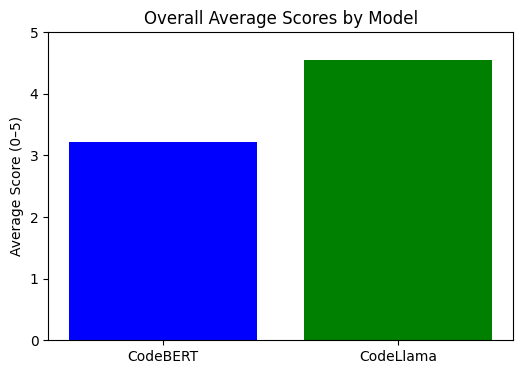

In [12]:
avg_scores = {}
for model in models:
    avg_scores[model] = np.mean([np.mean(scores[model][lvl]) for lvl in scores[model]])

plt.figure(figsize=(6,4))
plt.bar(avg_scores.keys(), avg_scores.values(), color=["blue", "green"])
plt.title("Overall Average Scores by Model")
plt.ylabel("Average Score (0–5)")
plt.ylim(0,5)
plt.show()

In [13]:
def make_radar_chart(model_name, model_scores):
    levels = ["Beginner", "Intermediate", "Advanced"]
    labels = criteria
    num_vars = len(labels)

    # Angles must match number of criteria
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # close the loop

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    for lvl in levels:
        values = model_scores[lvl.lower()]
        values = values[:]  # copy
        values += values[:1]  # repeat first value to close loop

        ax.plot(angles, values, label=lvl)
        ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 5)
    plt.title(f"Radar Chart - {model_name}")
    plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))
    plt.show()

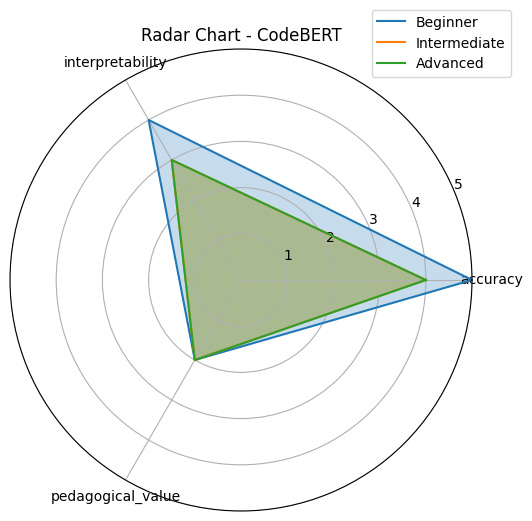

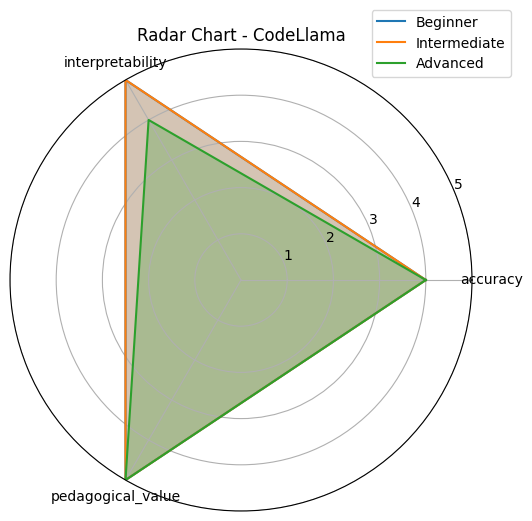

In [14]:
make_radar_chart("CodeBERT", scores["CodeBERT"])
make_radar_chart("CodeLlama", scores["CodeLlama"])

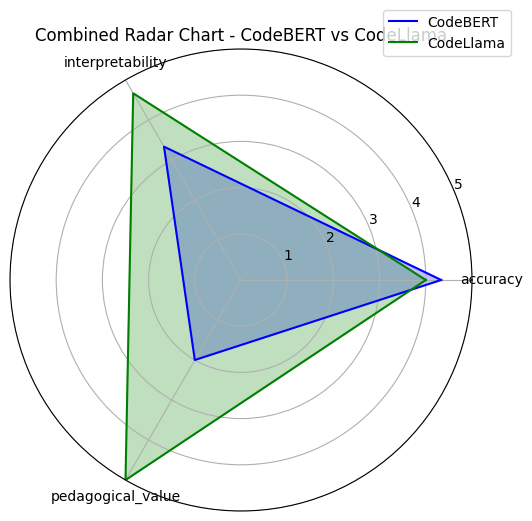

In [15]:
def make_combined_radar(scores):
    labels = criteria
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)

    for model, color in zip(models, ["blue", "green"]):
        avg_values = np.mean([scores[model][lvl] for lvl in scores[model]], axis=0).tolist()
        avg_values += avg_values[:1]
        ax.plot(angles, avg_values, label=model, color=color)
        ax.fill(angles, avg_values, alpha=0.25, color=color)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_ylim(0,5)
    plt.title("Combined Radar Chart - CodeBERT vs CodeLlama")
    plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))
    plt.show()
make_combined_radar(scores)